# Prediccion de la diabetes (Solucion)

### Paso 1: Carga del conjunto de datos

Cargamos la data y visualizamos

In [14]:
import pandas as pd

total_data = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/decision-tree-project-tutorial/main/diabetes.csv")
total_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### Paso 2: Realiza un EDA completo


Para ello, veamos cuanta informacion tiene nuestro DataFrame

In [15]:
# Obtener dimensiones
total_data.shape

(768, 9)

In [16]:
# Obtain information about data types and non-null values
total_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Lo anterior revela que el DataFrame contiene 768 registros (numero total de filas) y 9 variables observadas (numero total de columnas), de las cuales sabemos que:

+ Todas las variables son del tipo numerico.

+ la variables Outcome es del tipo categorico cuyos valores que puede tomar es de 0,1; siendo 0 negativo en la presencia de la diabetes y 1 es positivo en la presencia de diabetes.

Adicionalmente no existen valores faltantes en la data.


#### Analisis de estadisticos univariados

Para ellos estudiaremos laas variables

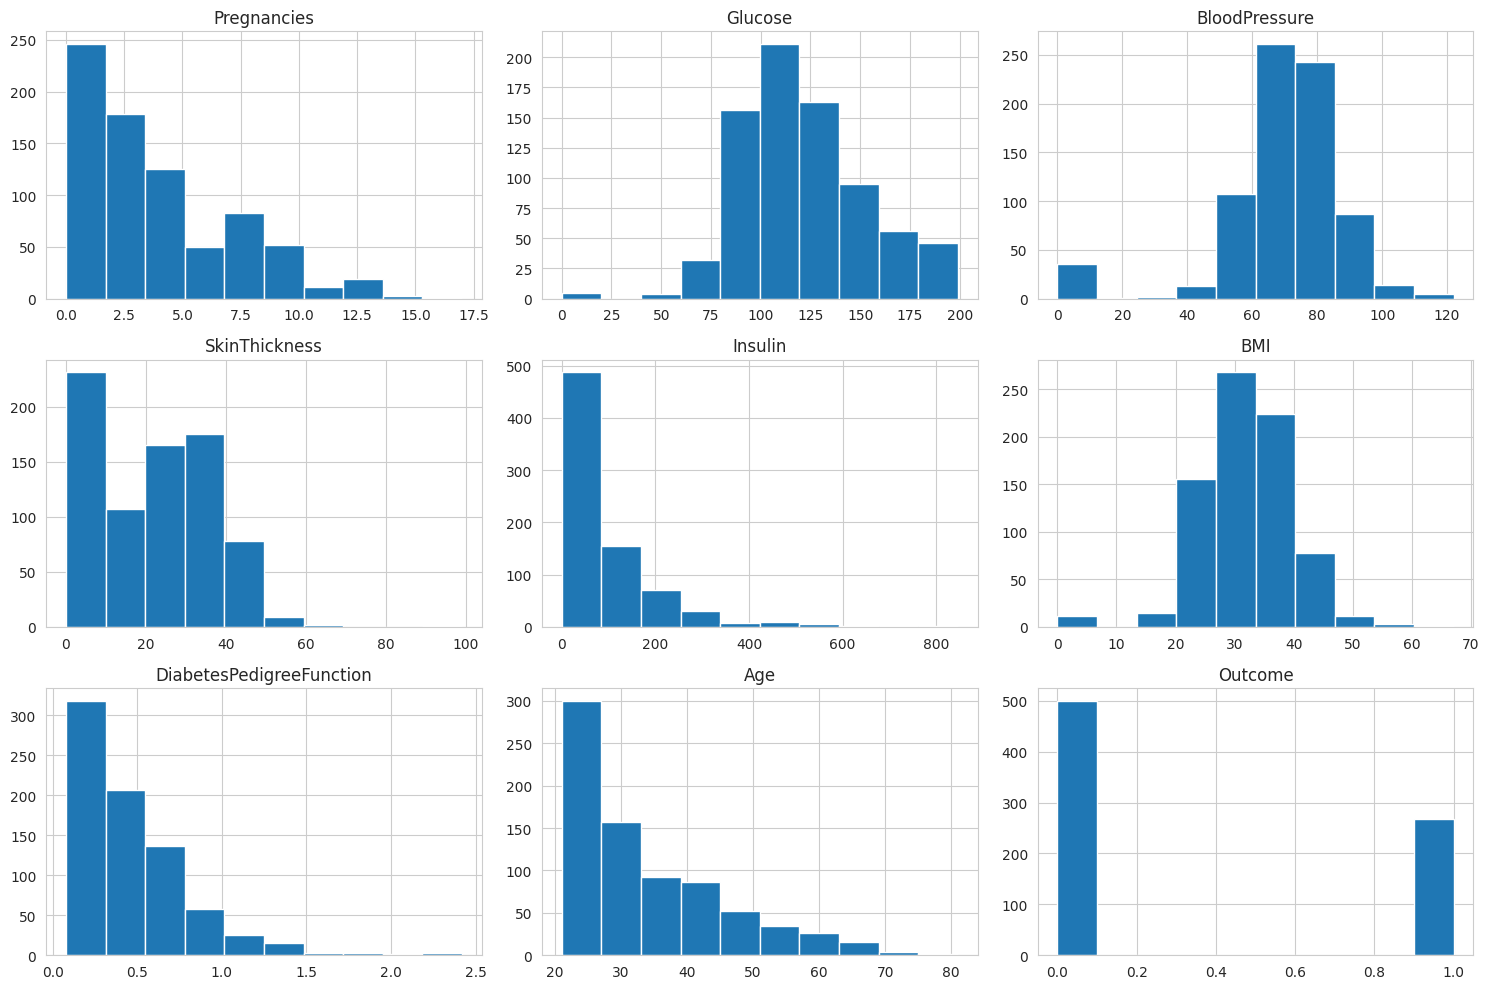

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns   

# Obtener las columnas numericas **antes** de llamar a la funcion
numeric_cols = total_data.select_dtypes(include=['number']).columns 

def plot_histograms(data, cols, rows, figsize=(15, 10)):
    """
    Crea una cuadricula de histogramas para las columnas numericas de un DataFrame.

    Args:
        data: DataFrame con los datos.
        cols: Numero de columnas en la cuadricula.
        rows: Numero de filas en la cuadricula.
        figsize: Tamaño de la figura.
    """

    fig, axes = plt.subplots(rows, cols, figsize=figsize)
    for i, col in enumerate(numeric_cols):
        plt.subplot(rows, cols, i+1)
        plt.hist(data[col])
        plt.title(col)
    plt.tight_layout()
    plt.show()

# Crear una cuadrícula de 3x3
plot_histograms(total_data, cols=3, rows=3)

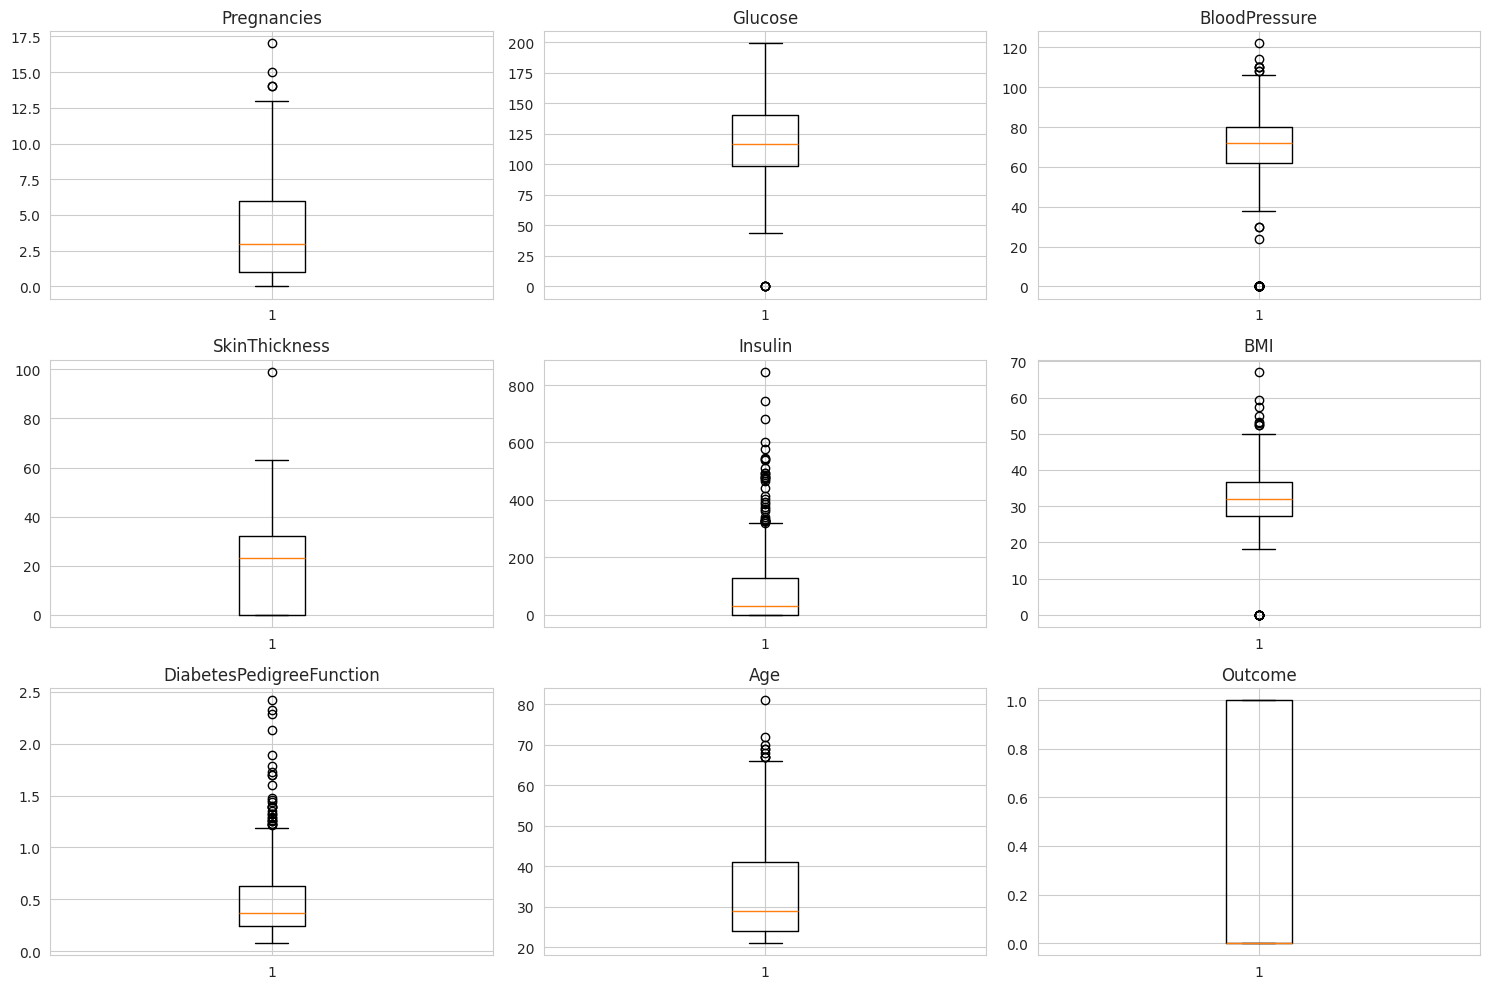

In [ ]:
# Obtener las columnas numericas **antes** de llamar a la funcion
# numeric_cols = total_data.select_dtypes(include=['number']).columns 

def plot_boxplots(data, cols, rows, figsize=(15, 10)):
    """
    Crea una cuadricula de diagramas de caja para las columnas numericas de un DataFrame.

    Args:
        data: DataFrame con los datos.
        cols: Numero de columnas en la cuadricula.
        rows: Numero de filas en la cuadricula.
        figsize: Tamaño de la figura.
    """

    fig, axes = plt.subplots(rows, cols, figsize=figsize)
    for i, col in enumerate(numeric_cols):
        plt.subplot(rows, cols, i+1)
        plt.boxplot(data[col])
        plt.title(col)
    plt.tight_layout()
    plt.show()

# Crear una cuadrícula de 3x3
plot_boxplots(total_data, cols=3, rows=3)

De los graficos anteriores podemos indicar que:


+ Variable `Pregnancies`: la distribucion del numero de embarazos de los pacientes posee asimetria a la derecha y presencia de valores extremos.

+ Variable `Glucose`: la distribucion de la concentración de glucosa en plasma a las 2 horas de un test de tolerancia oral a la glucosa posee un comportamiento simetrico y no posee valores extremos.

+ Variable `BloodPressure`: la diostribucion de la presión arterial diastólica (medida en mm Hg) posee un comportamiento simetrico y posee valores extremos.

+ Variable `SkinThickness`: la distribucion del grosor del pliegue cutáneo del tríceps posee un comportamiento asimetrico a la derecha y posee valores extremos.

+ Variable `Insulin`: la distribucion de la insulina sérica de 2 horas posee un comportamiento asimetrico a la derecha y posee valores extremos.

+ Variable `BMI`: la distribucion del Indice de masa corporal posee un comportamiento simetrico y posee valores extremos.

+ Variable `DiabetesPedigreeFunction`: la distribucion de la función de pedigrí de diabetes posee asimetria a la derecha y presencia de valores extremos.

+ Variable `Age`: la distribucion de las edades de los pacientes posee asimetria a la derecha y presencia de valores extremos.

+ Variable `Outcome`: la variable de clase (0 o 1), siendo 0 negativo en diabetes y 1, positivo por ser de conteo revela que la poblacion de estudio posee una poblacion sana de diabetes superior a la poblacion que sufre de diabeles.


#### Procedamos a realizar las estadisticas multivarianes
